"Third" Light
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.0 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.0,<2.1"

As always, let's do imports and initialize a logger and a new bundle.  See [Building a System](building_a_system.html) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

/home/kyle/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Relevant Parameters
-----------------------

The 'l3' parameter describes how much third light exists in a given passband.  Since this is passband dependent and only used for flux measurments - it does not yet exist for a new empty Bundle.

In [3]:
b.filter(qualifier='l3')

<ParameterSet: EMPTY>

So let's add a LC dataset

In [4]:
b.add_dataset('lc', times=np.linspace(0,1,101), dataset='lc01')

<ParameterSet: 15 parameters | contexts: compute, dataset>

We now see that the LC dataset created an 'l3' parameters for the new dataset.

In [5]:
b.filter(qualifier='l3')

<ParameterSet: 1 parameters>

In [6]:
print b['l3@lc01']

Parameter: l3@lc01@dataset
                       Qualifier: l3
                     Description: Third light
                           Value: 0.0 W / m3
                  Constrained by: 
                      Constrains: None
                      Related to: None



Influence on Light Curves (Fluxes)
-----------------------------------------

"Third" light is simply additional flux added to the light curve from some external source - whether it be crowding from a background object, light from the sky, or an extra component in the system that is unaccounted for in the system hierarchy.

To see this we'll compare a light curve with and without "third" light.

In [7]:
b.run_compute(irrad_method='none', model='no_third_light')

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

In [8]:
b['l3@lc01'] = 5

In [9]:
b.run_compute(irrad_method='none', model='with_third_light')

<ParameterSet: 2 parameters | qualifiers: fluxes, times>

As expected, adding 5 W/m^3 of third light simply shifts the light curve up by that exact same amount.

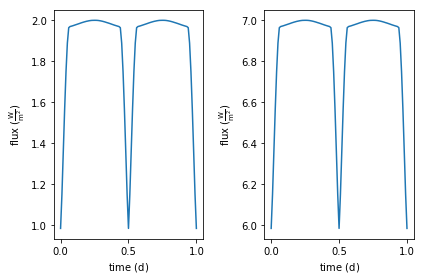

In [10]:
fig = plt.figure()
ax1, ax2 = fig.add_subplot(121), fig.add_subplot(122)

axs, artists = b['lc01'].plot(model='no_third_light', ax=ax1)
axs, artists = b['lc01'].plot(model='with_third_light', ax=ax2)

Influence on Meshes (Intensities)
-----------------------------------------

"Third" light does not affect the intensities stored in the mesh (including those in relative units).  In other words, like [distance](distance), "third" light only scales the fluxes.

NOTE: this is different than pblums which **DO** affect the relative intensities.  Again, see the [pblum tutorial](pblum) for more details.

To see this we can run both of our models again and look at the values of the intensities in the mesh.

In [11]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

<ParameterSet: 2 parameters | contexts: compute, dataset>

In [12]:
b['l3@lc01'] = 0.0

In [13]:
b.run_compute(irrad_method='none', model='no_third_light')

Sat, 04 May 2019 14:09 BUNDLE       WARNING overwriting model: no_third_light


<ParameterSet: 80 parameters | kinds: mesh, lc>

In [14]:
b['l3@lc01'] = 5

In [15]:
b.run_compute(irrad_method='none', model='with_third_light')

Sat, 04 May 2019 14:10 BUNDLE       WARNING overwriting model: with_third_light


<ParameterSet: 80 parameters | kinds: mesh, lc>

In [16]:
print "no_third_light abs_intensities: ", b.get_value(qualifier='abs_intensities', component='primary', dataset='lc01', model='no_third_light').mean()
print "with_third_light abs_intensities: ", b.get_value(qualifier='abs_intensities', component='primary', dataset='lc01', model='with_third_light').mean()

no_third_light abs_intensities:  27931574052886.48
with_third_light abs_intensities:  27931574052886.48


In [17]:
print "no_third_light intensities: ", b.get_value(qualifier='intensities', component='primary', dataset='lc01', model='no_third_light').mean()
print "with_third_light intensities: ", b.get_value(qualifier='intensities', component='primary', dataset='lc01', model='with_third_light').mean()

no_third_light intensities:  6.250537176346449e-12
with_third_light intensities:  6.250537176346449e-12
